<a href="https://colab.research.google.com/github/krishnasameera84/Item-demand-Forcasting-using-ML/blob/main/Demand_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
 import numpy as np
import pandas as pd
from easypreprocessing import EasyPreProcessing
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

Easypreprocessing is a library used for common ML related preprocessing activities.

In [12]:
prep = EasyPreProcessing('train 2.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [10]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/train 2.csv"

In [4]:
df = pd.read_csv(path)

In [ ]:
df.head(10)

In [ ]:
! pip install easypreprocessing

In [13]:
prep.info



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correlation()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correlation()</td><td>Display correlation heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

# **Handling Null Values**

In [14]:
prep.categorical.fields

['date']

In [15]:
prep.numerical.fields

['store', 'item', 'sales']

In [16]:
prep.missing_values

date     0
store    1
item     1
sales    1
dtype: int64

In [17]:
prep.numerical.impute()

Numerical features imputated successfully.


In [19]:
prep.df

,date,store,item,sales
0,2013-01-01,1.000000,1.000000,13.00000
1,2013-01-02,1.000000,1.000000,11.00000
2,2013-01-03,1.000000,1.000000,14.00000
3,2013-01-04,1.000000,1.000000,13.00000
4,2013-01-05,1.000000,1.000000,10.00000
...,...,...,...,...
336690,2014-12-08,5.000000,19.000000,23.00000
336691,2014-12-09,5.000000,19.000000,22.00000
336692,2014-12-10,5.000000,19.000000,26.00000
336693,2014-12-11,5.000000,19.000000,28.00000


Create a new column 'key' for unique identification. This is done in order to handle the duplicate data in 'week' column.

In [20]:
prep.dataset['key'] = prep.df['date'].astype(str) + '_' + prep.df['store'].astype(str) 

Removing columns that are not helpful for time series predictions.

In [21]:
prep.dataset = prep.df.drop(['date' , 'store' , 'item'] , axis = 1)

Summing sales group by key.

In [22]:
prep.dataset = prep.df.groupby('key').sum()

In [23]:
prep.df

,sales
key,
2013-01-01_1.0,477.00000
2013-01-01_10.0,568.00000
2013-01-01_2.0,675.00000
2013-01-01_3.0,646.00000
2013-01-01_4.0,527.00000
...,...
2017-12-31_6.0,761.00000
2017-12-31_7.0,684.00000
2017-12-31_8.0,1197.00000


<AxesSubplot:xlabel='key'>

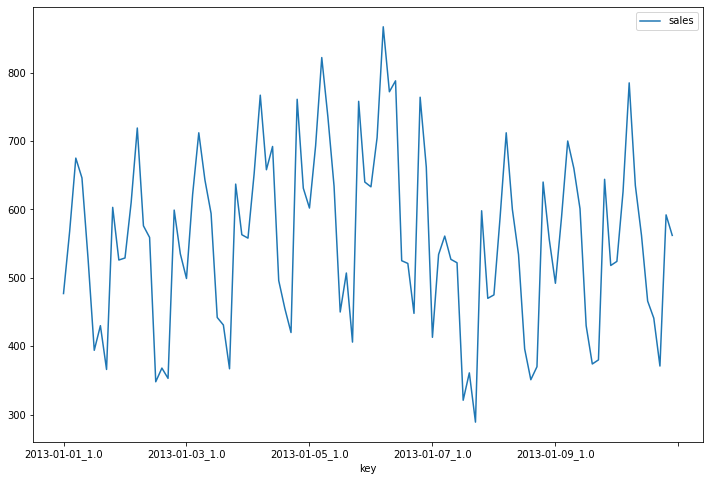

In [24]:
prep.df[:100].plot(figsize=(12,8))

### **Converting The Supervised Dataset**

sales becomes target variable

year_1, year_2, year_3, year_4 becomes input

We will train our model to predict sales based on previous 4 years.

In [25]:
prep.df['year_1'] = prep.df['sales'].shift(-1)
prep.df['year_2'] = prep.df['sales'].shift(-2)
prep.df['year_3'] = prep.df['sales'].shift(-3)
prep.df['year_4'] = prep.df['sales'].shift(-4)

In [26]:
prep.df

,sales,year_1,year_2,year_3,year_4
key,,,,,
2013-01-01_1.0,477.00000,568.00000,675.00000,646.00000,527.00000
2013-01-01_10.0,568.00000,675.00000,646.00000,527.00000,394.00000
2013-01-01_2.0,675.00000,646.00000,527.00000,394.00000,430.00000
2013-01-01_3.0,646.00000,527.00000,394.00000,430.00000,366.00000
2013-01-01_4.0,527.00000,394.00000,430.00000,366.00000,603.00000
...,...,...,...,...,...
2017-12-31_6.0,761.00000,684.00000,1197.00000,1026.00000,54.67657
2017-12-31_7.0,684.00000,1197.00000,1026.00000,54.67657,NaN
2017-12-31_8.0,1197.00000,1026.00000,54.67657,NaN,NaN


Remove NA data

In [27]:
df = prep.df.dropna()

<AxesSubplot:xlabel='key'>

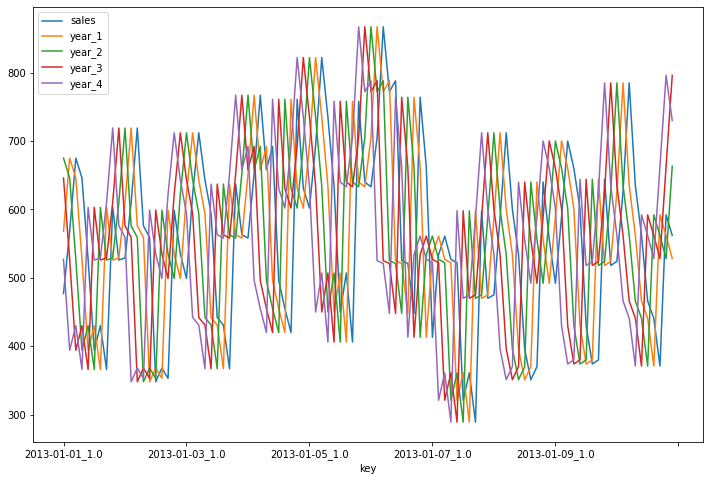

In [28]:
df[:100].plot(figsize=(12,8))

# **Train-Test Split**

In [29]:
x1, x2, x3, x4, y = df['year_1'], df['year_2'], df['year_3'], df['year_4'], df['sales']
x1, x2, x3, x4, y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(y)
x1, x2, x3, x4, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), y.reshape(-1,1)

split_percentage = 15
test_split = int(len(df)*(split_percentage/100))
x = np.concatenate((x1, x2, x3, x4), axis=1)
X_train,X_test,y_train,y_test = x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15519, 4)
(2738, 4)
(15519, 1)
(2738, 1)


## **Random Forest Regression**

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

<ipython-input-31-b5abeaeb461d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [32]:
print("R Sq. Score for Random Forest Regression :", rf_regressor.score(X_test, y_test))

R Sq. Score for Random Forest Regression : 0.9035231441359667


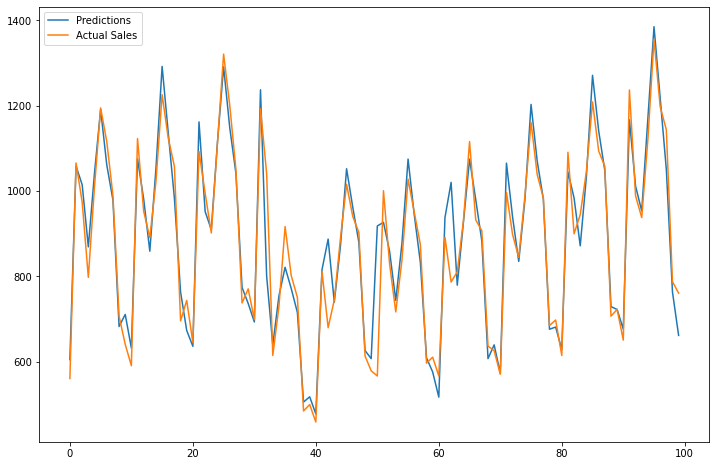

In [33]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

## **XGBoost Regression**

In [34]:
import xgboost
xgb_regressor = xgboost.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

In [35]:
print("R Sq. Score for XGBoost :", xgb_regressor.score(X_test, y_test))

R Sq. Score for XGBoost : 0.9053028411046602


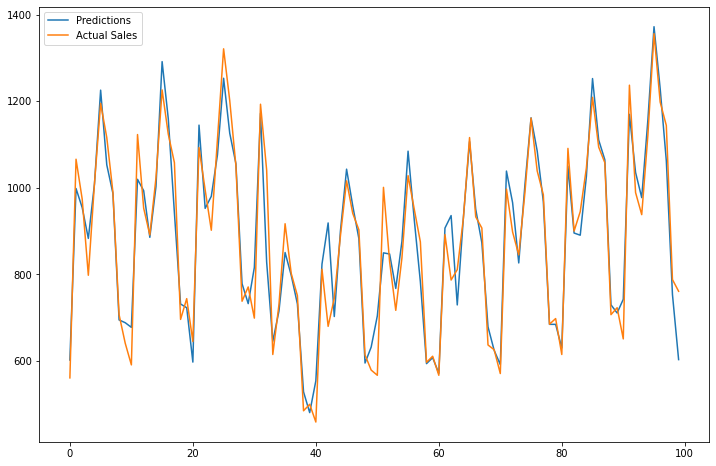

In [36]:
import matplotlib.pyplot as plt
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

# **Hyperparameter Tuning for Random Forest**

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 120, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 72, 94, 116, 138, 161, 183, 205, 227, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 6, 12, 18, 25, 31, 37, 44, 50, 56, 63, 69, 75, 82, 88, 94, 101, 107, 113, 120, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [39]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

In [40]:
rf_random.best_params_

{'n_estimators': 205,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [41]:
best_random = rf_random.best_estimator_

In [42]:
y_pred = best_random.predict(X_test)

In [47]:
print("R Sq. Score for Random Forest Regression :", best_random.score(X_test, y_test))
print("Adj. R Sq. Score for Random Forest Regression :", 1 - (1 - best_random.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ))


R Sq. Score for Random Forest Regression : 0.9199327399025504
Adj. R Sq. Score for Random Forest Regression : 0.9198155540114454


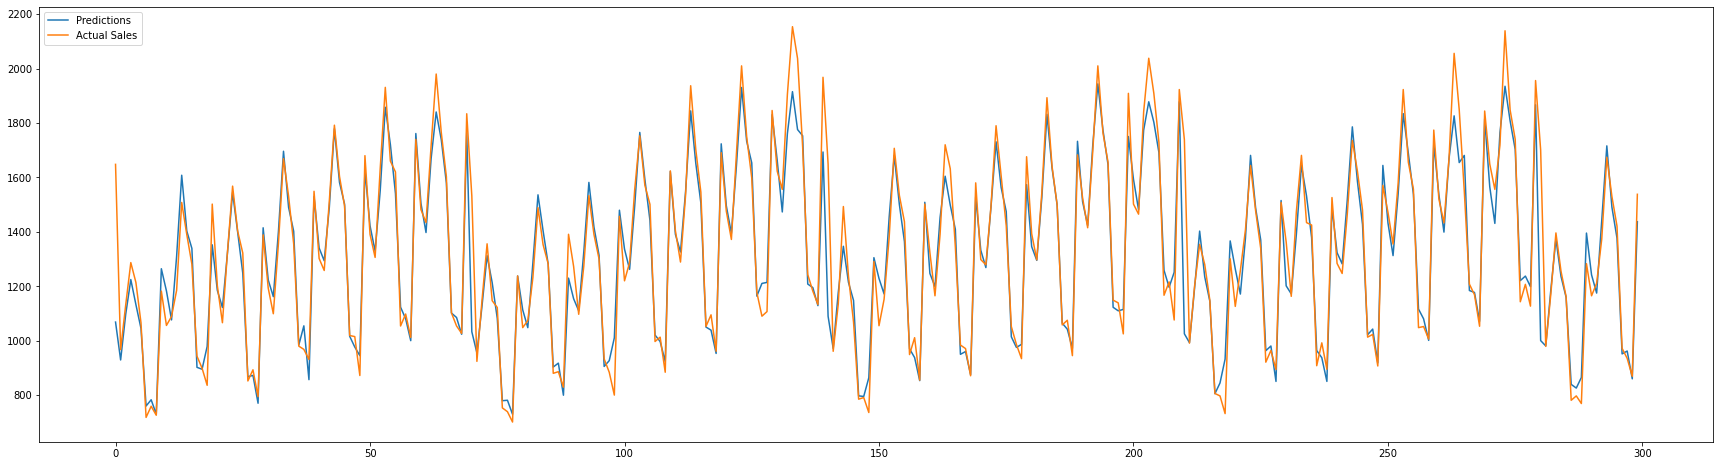

In [48]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[500:800], label='Predictions')
plt.plot(y_test[500:800], label='Actual Sales')
plt.legend(loc="upper left")
plt.savefig('final.png')
plt.show()